In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import shap
shap.initjs()
import warnings
warnings.simplefilter('ignore')

In [2]:
fao_data = pd.read_csv("latest_2504.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,255388.810691,141418.674834,331000.587974,Apples,25.331101,274.402429,605.783965,649.217529,1829.067462,916.135858,...,81.037938,109.688023,109.687327,109.686628,259.436250,259.436710,259.437173,0.668353,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Apricots,1.582001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,109.688717,109.687327,109.686628,259.435792,259.436710,259.437173,5.000001,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Cherries,4.086701,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,110.000001,109.688717,109.686628,259.230001,259.435792,259.437173,5.000001,5.000001,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Currants,6.042201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037818,110.000001,110.000001,109.688717,259.230001,259.230001,259.435792,5.000001,5.000001,5.000001
1990-01-01,256551.000001,142347.000001,332132.000001,Gooseberries,5.812001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,5.000001,5.000001,5.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,256551.000001,142347.000001,332132.000001,Sunflower seed,2.421201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,86.020001,110.000001,110.000001,29.000001,259.230001,259.230001,290.230001,0.410001,0.410001,0.410001
2020-01-01,149944.000001,86763.000001,358986.000001,Hop cones,3.519101,259.810001,367.000001,793.830001,1968.210001,142.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,0.410001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Rape or colza seed,4.693201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,26.000001,110.000001,110.000001,263.230001,259.230001,259.230001,0.100001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Soya beans,2.281201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,26.000001,110.000001,259.230001,263.230001,259.230001,0.100001,0.100001,0.410001


In [3]:
x_vals = ['Nutrient nitrogen N (total) - tonnes',
 'Nutrient phosphate P2O5 (total) - tonnes',
 'Nutrient potash K2O (total) - tonnes',
 'Fung & Bact – Benzimidazoles',
 'Fung & Bact – Diazines, morpholines',
 'Fung & Bact – Dithiocarbamates',
 'Fung & Bact – Inorganics',
 'Fung & Bact – Other',
 'Fung & Bact – Triazoles, diazoles',
 'Herbicides – Amides',
 'Herbicides – Carbamates',
 'Herbicides – Dinitroanilines',
 'Herbicides – Other',
 'Herbicides – Phenoxy hormone products',
 'Herbicides – Triazines',
 'Herbicides – Urea derivates',
 'Insecticides – Botanical products and biologicals',
 'Insecticides – Carbamates',
 'Insecticides – Organo-phosphates',
 'Insecticides – Other',
 'Insecticides – Pyrethroids',
 'Mineral Oils',
 'Plant Growth Regulators',
 'Rodenticides – Other',
 'Herbicides – Bipiridils',
 'Herbicides – Sulfonyl ureas',
 'Rodenticides – Anti-coagulants',
 'Nutrient nitrogen N (total) - tonnes-1',
 'Nutrient nitrogen N (total) - tonnes-2',
 'Nutrient nitrogen N (total) - tonnes-3',
 'Nutrient phosphate P2O5 (total) - tonnes-1',
 'Nutrient phosphate P2O5 (total) - tonnes-2',
 'Nutrient phosphate P2O5 (total) - tonnes-3',
 'Nutrient potash K2O (total) - tonnes-1',
 'Nutrient potash K2O (total) - tonnes-2',
 'Nutrient potash K2O (total) - tonnes-3',
 'Yield(tonnes/ha)-1',
 'Yield(tonnes/ha)-2',
 'Yield(tonnes/ha)-3',
 'Fung & Bact – Benzimidazoles-1',
 'Fung & Bact – Benzimidazoles-2',
 'Fung & Bact – Benzimidazoles-3',
 'Fung & Bact – Diazines, morpholines-1',
 'Fung & Bact – Diazines, morpholines-2',
 'Fung & Bact – Diazines, morpholines-3',
 'Fung & Bact – Dithiocarbamates-1',
 'Fung & Bact – Dithiocarbamates-2',
 'Fung & Bact – Dithiocarbamates-3',
 'Fung & Bact – Inorganics-1',
 'Fung & Bact – Inorganics-2',
 'Fung & Bact – Inorganics-3',
 'Fung & Bact – Other-1',
 'Fung & Bact – Other-2',
 'Fung & Bact – Other-3',
 'Fung & Bact – Triazoles, diazoles-1',
 'Fung & Bact – Triazoles, diazoles-2',
 'Fung & Bact – Triazoles, diazoles-3',
 'Herbicides – Amides-1',
 'Herbicides – Amides-2',
 'Herbicides – Amides-3',
 'Herbicides – Carbamates-1',
 'Herbicides – Carbamates-2',
 'Herbicides – Carbamates-3',
 'Herbicides – Dinitroanilines-1',
 'Herbicides – Dinitroanilines-2',
 'Herbicides – Dinitroanilines-3',
 'Herbicides – Other-1',
 'Herbicides – Other-2',
 'Herbicides – Other-3',
 'Herbicides – Phenoxy hormone products-1',
 'Herbicides – Phenoxy hormone products-2',
 'Herbicides – Phenoxy hormone products-3',
 'Herbicides – Triazines-1',
 'Herbicides – Triazines-2',
 'Herbicides – Triazines-3',
 'Herbicides – Urea derivates-1',
 'Herbicides – Urea derivates-2',
 'Herbicides – Urea derivates-3',
 'Insecticides – Botanical products and biologicals-1',
 'Insecticides – Botanical products and biologicals-2',
 'Insecticides – Botanical products and biologicals-3',
 'Insecticides – Carbamates-1',
 'Insecticides – Carbamates-2',
 'Insecticides – Carbamates-3',
 'Insecticides – Organo-phosphates-1',
 'Insecticides – Organo-phosphates-2',
 'Insecticides – Organo-phosphates-3',
 'Insecticides – Other-1',
 'Insecticides – Other-2',
 'Insecticides – Other-3',
 'Insecticides – Pyrethroids-1',
 'Insecticides – Pyrethroids-2',
 'Insecticides – Pyrethroids-3',
 'Mineral Oils-1',
 'Mineral Oils-2',
 'Mineral Oils-3',
 'Plant Growth Regulators-1',
 'Plant Growth Regulators-2',
 'Plant Growth Regulators-3',
 'Rodenticides – Other-1',
 'Rodenticides – Other-2',
 'Rodenticides – Other-3',
 'Herbicides – Bipiridils-1',
 'Herbicides – Bipiridils-2',
 'Herbicides – Bipiridils-3',
 'Herbicides – Sulfonyl ureas-1',
 'Herbicides – Sulfonyl ureas-2',
 'Herbicides – Sulfonyl ureas-3',
 'Rodenticides – Anti-coagulants-1',
 'Rodenticides – Anti-coagulants-2',
 'Rodenticides – Anti-coagulants-3']

In [4]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

In [5]:
shap_df = pd.DataFrame()

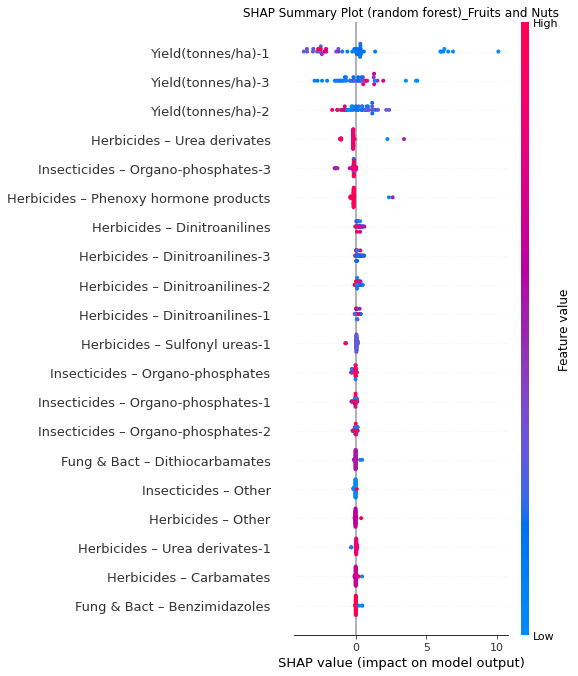

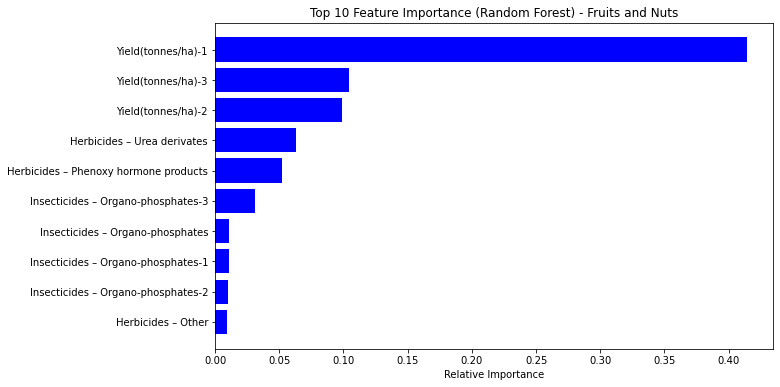

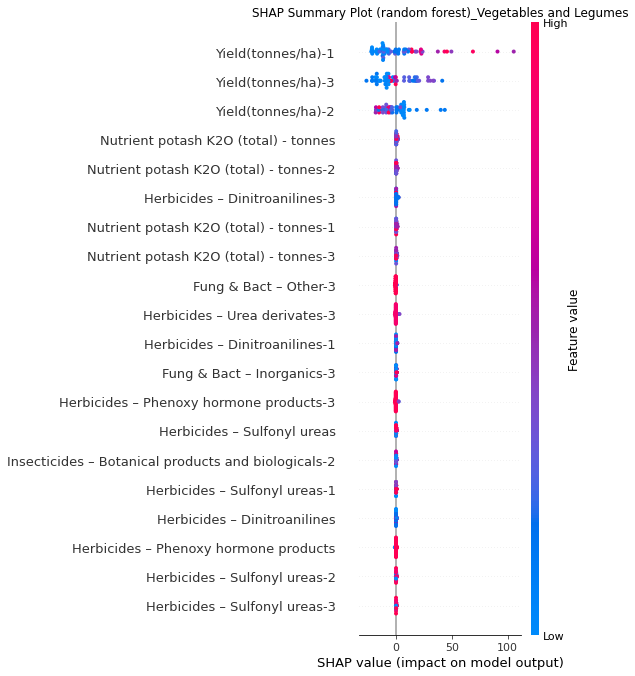

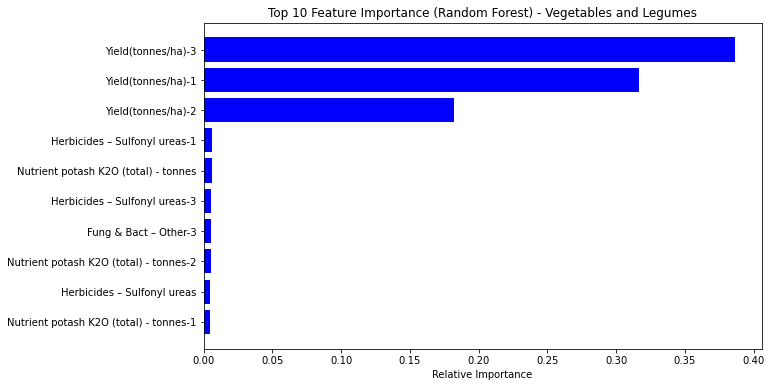

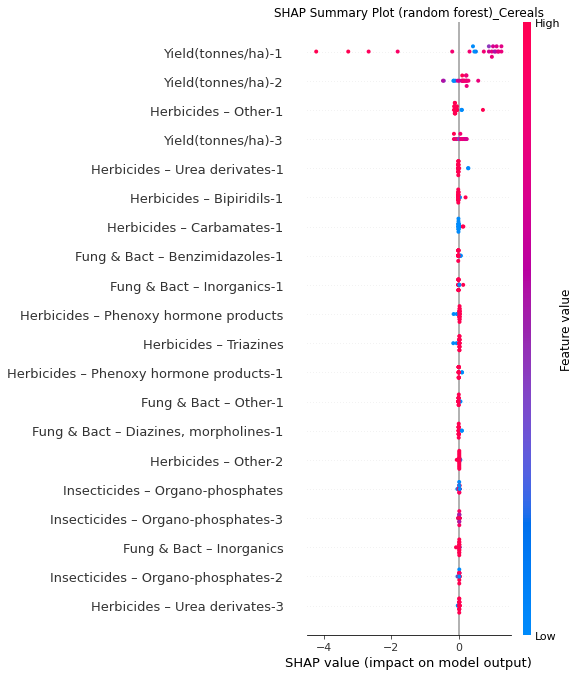

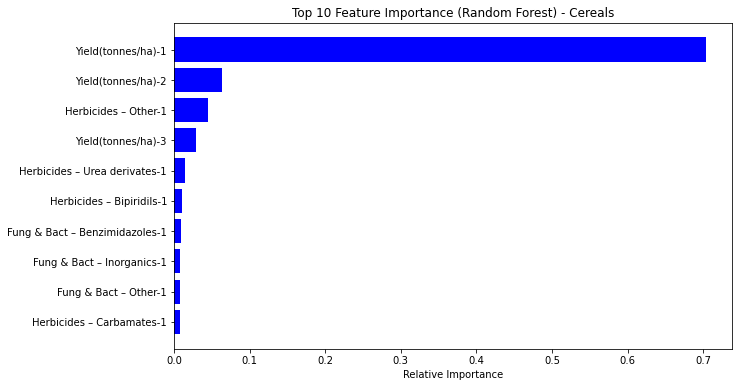

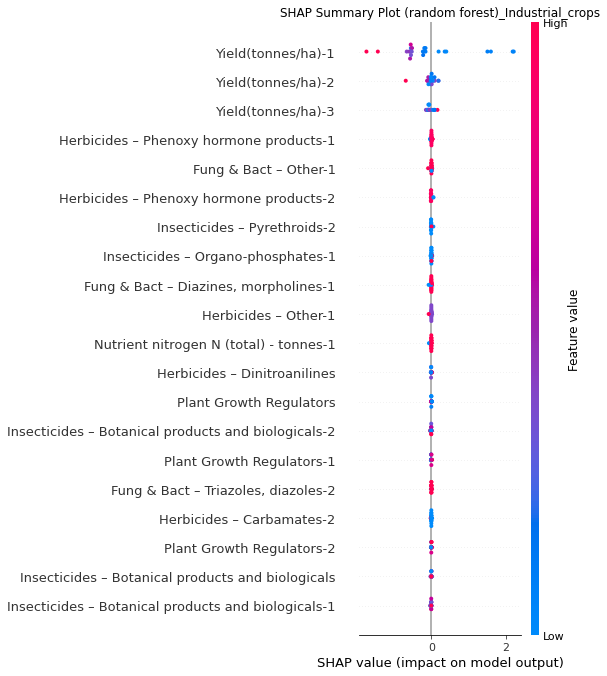

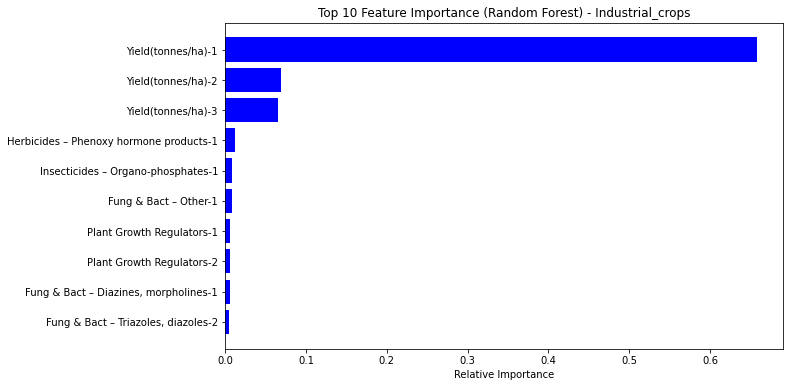

In [10]:
#doc = Document()
mmsc_X = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    x = pd.DataFrame(mmsc_X.fit_transform(crop_df[x_vals]), columns=x_vals)
    y = crop_df['Yield(tonnes/ha)']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42, max_depth= 10)
    regressor.fit(x_train, y_train)
    #display(pd.DataFrame(x_train))
    #display(pd.DataFrame(y_test)['Yield(tonnes/ha)'])
   #  #prediction of new value
    y_pred = regressor.predict(x_test)


    #shap implementation
    explainer = shap.TreeExplainer(regressor)
    shap_values = explainer.shap_values(x_test)
    
    plt.title("SHAP Summary Plot (random forest)" + "_" + cat)
    shap.summary_plot(shap_values, x_test)
    plt.show()
    shap_df_crop = pd.DataFrame(shap_values, columns=x_test.columns)
    shap_mean_crop = shap_df_crop.mean()
    shap_df[cat] = shap_mean_crop 
    importances = regressor.feature_importances_
    indices = np.argsort(importances)[-10:]  # select the indices of top 10 features
    features = x_train.columns
    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Feature Importance (Random Forest) - ' + cat)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()  


In [16]:
shap_df = shap_df.add_prefix('mean shap values (Random Forest)_')
shap_df

,mean shap values (Random Forest)_Fruits and Nuts,mean shap values (Random Forest)_Vegetables and Legumes,mean shap values (Random Forest)_Cereals,mean shap values (Random Forest)_Industrial_crops,mean shap values (Random Forest)_mean_shap_value
Nutrient nitrogen N (total) - tonnes,0.004508,0.004181,-0.000238,0.000242,0.002173
Nutrient phosphate P2O5 (total) - tonnes,-0.006095,0.008959,-0.000661,-0.000055,0.000537
Nutrient potash K2O (total) - tonnes,-0.010745,0.486443,0.002542,-0.000129,0.119527
Fung & Bact – Benzimidazoles,0.014008,0.007884,-0.001544,0.000039,0.005097
"Fung & Bact – Diazines, morpholines",-0.003400,0.002596,0.000629,0.000244,0.000017
...,...,...,...,...,...
Herbicides – Sulfonyl ureas-2,0.001254,0.151680,0.000320,0.001393,0.038661
Herbicides – Sulfonyl ureas-3,0.002401,0.152863,-0.000028,0.000131,0.038842
Rodenticides – Anti-coagulants-1,0.011947,-0.022422,0.002502,0.002034,-0.001485
Rodenticides – Anti-coagulants-2,0.008827,-0.014496,0.003711,0.002334,0.000094


In [12]:
shap_df['mean_shap_value'] = shap_df.mean(axis=1)
shap_df

,Fruits and Nuts,Vegetables and Legumes,Cereals,Industrial_crops,mean_shap_value
Nutrient nitrogen N (total) - tonnes,0.004508,0.004181,-0.000238,0.000242,0.002173
Nutrient phosphate P2O5 (total) - tonnes,-0.006095,0.008959,-0.000661,-0.000055,0.000537
Nutrient potash K2O (total) - tonnes,-0.010745,0.486443,0.002542,-0.000129,0.119527
Fung & Bact – Benzimidazoles,0.014008,0.007884,-0.001544,0.000039,0.005097
"Fung & Bact – Diazines, morpholines",-0.003400,0.002596,0.000629,0.000244,0.000017
...,...,...,...,...,...
Herbicides – Sulfonyl ureas-2,0.001254,0.151680,0.000320,0.001393,0.038661
Herbicides – Sulfonyl ureas-3,0.002401,0.152863,-0.000028,0.000131,0.038842
Rodenticides – Anti-coagulants-1,0.011947,-0.022422,0.002502,0.002034,-0.001485
Rodenticides – Anti-coagulants-2,0.008827,-0.014496,0.003711,0.002334,0.000094


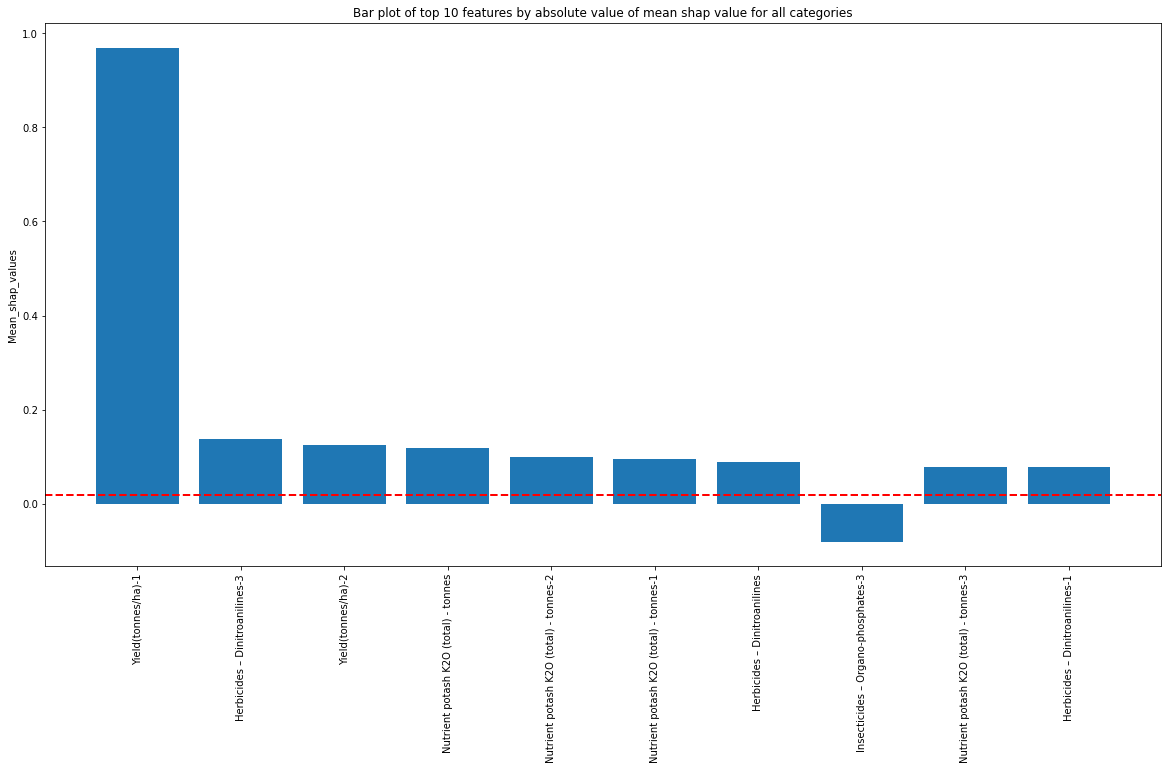

In [15]:
mean_shap = shap_df['mean_shap_value'].mean()
fig, ax = plt.subplots(figsize=(20, 10))

# Sort by absolute value of mean_shap_value and select top 10 rows
shap_df_top10 = shap_df.iloc[(-shap_df['mean_shap_value'].abs()).argsort()].head(10)

ax.bar(shap_df_top10.index, shap_df_top10['mean_shap_value'])
ax.axhline(mean_shap, color='red', linestyle='dashed', linewidth=2)
ax.set_xticklabels(shap_df_top10.index, rotation=90)
ax.set_ylabel('Mean_shap_values')
ax.set_title('Bar plot of top 10 features by absolute value of mean shap value for all categories')
plt.show()
